In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

# import from data_utils
from data_utils import load_data, column_summary

In [3]:
# Load data 
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\train.csv' 
df = load_data(file_path) 

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Call column_summary function
summary_df = column_summary(df) 
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Store,int64,0,1017209,1115
1,DayOfWeek,int64,0,1017209,7
2,Date,object,0,1017209,942
3,Sales,int64,0,1017209,21734
4,Customers,int64,0,1017209,4086
5,Open,int64,0,1017209,2
6,Promo,int64,0,1017209,2
7,StateHoliday,object,0,1017209,5
8,SchoolHoliday,int64,0,1017209,2


In [6]:
# Define a dictionary to map old column names to new column names
new_column_names = {
    'Store': 'store_id',
    'DayOfWeek': 'day_of_week',
    'Date': 'date',
    'Sales': 'sales',
    'Customers': 'customers',
    'Open': 'store_open', 
    'Promo': 'promotion',
    'StateHoliday': 'state_holiday',
    'SchoolHoliday': 'school_holiday'
}

# Rename the columns using the dictionary
df.rename(columns=new_column_names, inplace=True)


In [7]:
df.head()

,store_id,day_of_week,date,sales,customers,store_open,promotion,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
# Checking for summary statistics and duplicates
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())
print(df.describe())
print(df.duplicated().sum())

   store_id  day_of_week        date  sales  customers  store_open  promotion state_holiday  school_holiday
0         1            5  2015-07-31   5263        555           1          1             0               1
1         2            5  2015-07-31   6064        625           1          1             0               1
2         3            5  2015-07-31   8314        821           1          1             0               1
3         4            5  2015-07-31  13995       1498           1          1             0               1
4         5            5  2015-07-31   4822        559           1          1             0               1
           store_id   day_of_week         sales     customers    store_open     promotion  school_holiday
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06    1.017209e+06
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01    1.786467e-01
std    3.219087e+02  1.997391e+00 

## Relationshiph between Sales and Customer

In [9]:
# calling store data
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\store.csv' 
store_df = load_data(file_path) 

In [10]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
# for convinence rename the columns

store_df.rename(columns={
    'Store': 'store_id',
    'StoreType': 'store_type',
    'Assortment': 'assortment_level',
    'CompetitionDistance': 'competition_distance_m', 
    'CompetitionOpenSinceMonth': 'competition_opened_month',
    'CompetitionOpenSinceYear': 'competition_opened_year',
    'Promo2': 'promo_active', 
    'Promo2SinceWeek': 'promo2_start_week',
    'Promo2SinceYear': 'promo2_start_year',
    'PromoInterval': 'promo_interval'
}, inplace=True)

In [12]:
store_df.head()

,store_id,store_type,assortment_level,competition_distance_m,competition_opened_month,competition_opened_year,promo_active,promo2_start_week,promo2_start_year,promo_interval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
# merging store df with training df
store_train_df = pd.merge(store_df, df, on='store_id', how='left')

In [17]:
store_train_df.head()

,store_id,store_type,assortment_level,competition_distance_m,competition_opened_month,competition_opened_year,promo_active,promo2_start_week,promo2_start_year,promo_interval,day_of_week,date,sales,customers,store_open,promotion,state_holiday,school_holiday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [15]:
store_train_df.shape

(1017209, 18)

In [18]:
# fill the missing values
store_train_df['competition_opened_month'] = store_train_df['competition_opened_month'].fillna(0)
store_train_df['competition_opened_year'] = store_train_df['competition_opened_year'].fillna(0)
store_train_df['promo2_start_week'] = store_train_df['promo2_start_week'].fillna(0)
store_train_df['promo2_start_year'] = store_train_df['promo2_start_year'].fillna(0)
store_train_df['promo_interval'] = store_train_df['promo_interval'].fillna('0') 

In [21]:
store_train_df.isna().sum()

store_id                       0
store_type                     0
assortment_level               0
competition_distance_m      2642
competition_opened_month       0
competition_opened_year        0
promo_active                   0
promo2_start_week              0
promo2_start_year              0
promo_interval                 0
day_of_week                    0
date                           0
sales                          0
customers                      0
store_open                     0
promotion                      0
state_holiday                  0
school_holiday                 0
dtype: int64

In [22]:
mean_distance = store_train_df['competition_distance_m'].mean()
store_train_df['competition_distance_m'].fillna(mean_distance, inplace=True)

In [23]:
store_train_df.isna().sum()

store_id                    0
store_type                  0
assortment_level            0
competition_distance_m      0
competition_opened_month    0
competition_opened_year     0
promo_active                0
promo2_start_week           0
promo2_start_year           0
promo_interval              0
day_of_week                 0
date                        0
sales                       0
customers                   0
store_open                  0
promotion                   0
state_holiday               0
school_holiday              0
dtype: int64

In [24]:
df['customers'].unique()

array([ 555,  625,  821, ..., 3900,   36, 4065], shape=(4086,))

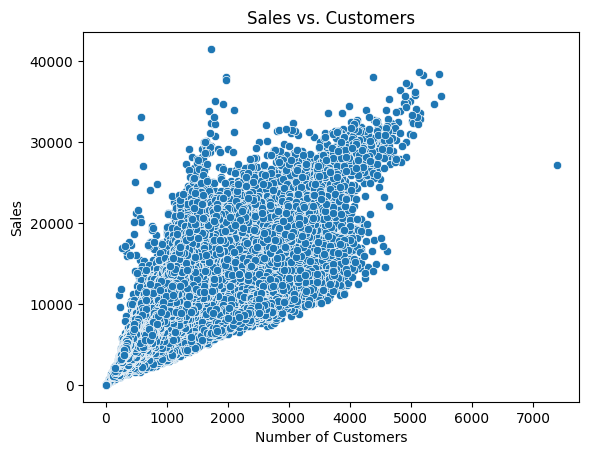

In [26]:
# Create a scatter plot
sns.scatterplot(x='customers', y='sales', data=store_train_df, palette='viridis')

# Customize the plot
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')

# Show the plot
plt.show()

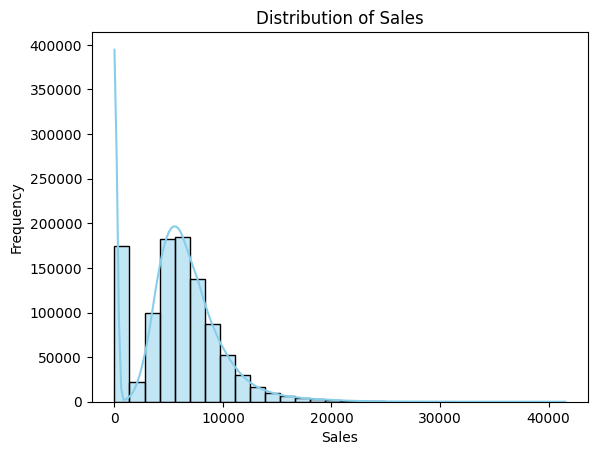

In [29]:
# Create a histogram of sales
sns.histplot(store_train_df['sales'], bins=30, kde=True, color='skyblue') 

# Customize the plot
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Relationship between Promotion and Sales

In [32]:
store_train_df.columns

Index(['store_id', 'store_type', 'assortment_level', 'competition_distance_m', 'competition_opened_month', 'competition_opened_year', 'promo_active', 'promo2_start_week', 'promo2_start_year', 'promo_interval', 'day_of_week', 'date', 'sales', 'customers', 'store_open', 'promotion', 'state_holiday', 'school_holiday'], dtype='object')

In [38]:
# Calculate average sales during promotions and non-promotions
avg_sales_promo = store_train_df[store_train_df['promotion'] == 1]['sales'].mean()
avg_sales_no_promo = store_train_df[store_train_df['promotion'] == 0]['sales'].mean()

print(f"Average Sales during Promotion: {avg_sales_promo:.2f}")
print(f"Average Sales without Promotion: {avg_sales_no_promo:.2f}")



Average Sales during Promotion: 7991.15
Average Sales without Promotion: 4406.05


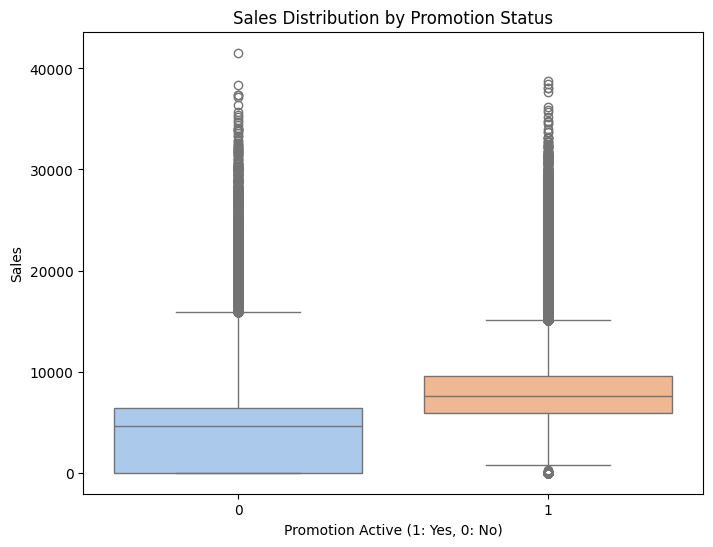

In [40]:
# Create a boxplot to visualize sales distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion', y='sales', data=store_train_df, palette='pastel')
plt.title('Sales Distribution by Promotion Status')
plt.xlabel('Promotion Active (1: Yes, 0: No)')
plt.ylabel('Sales')
plt.show()



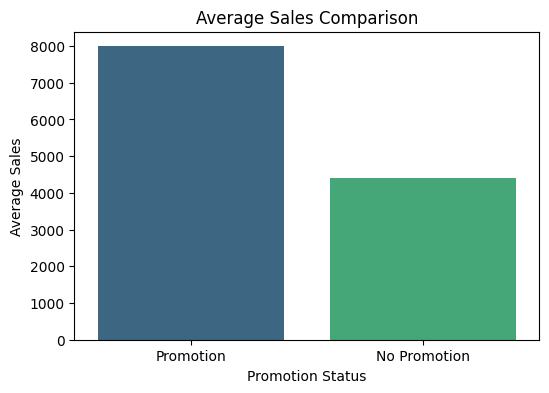

In [41]:
# Create a bar plot to compare average sales
plt.figure(figsize=(6, 4))
sns.barplot(x=['Promotion', 'No Promotion'], y=[avg_sales_promo, avg_sales_no_promo], palette='viridis')
plt.title('Average Sales Comparison')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.show()

In [42]:
# Calculate the number of promotions for each store
store_promotions = store_train_df.groupby('store_id')['promotion'].sum()


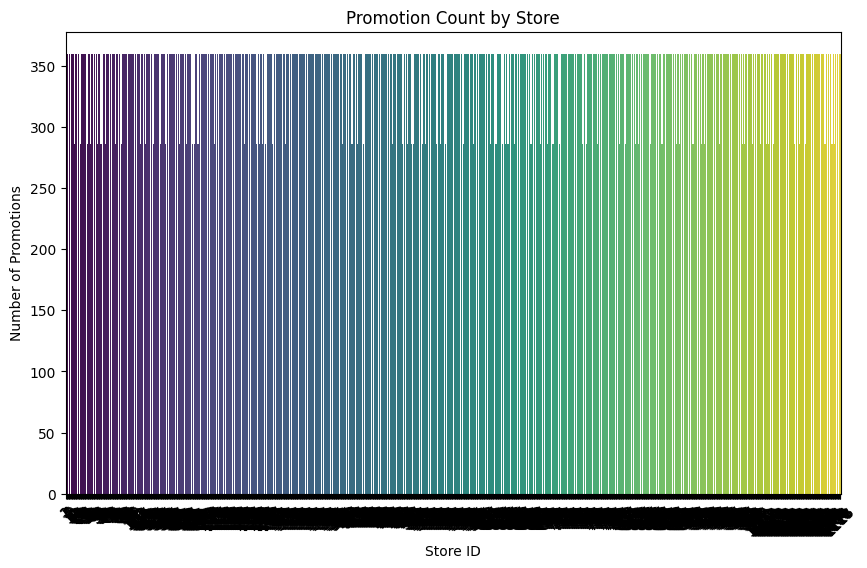

In [45]:
# Create a DataFrame to store the results
promo_counts_df = pd.DataFrame({'store_id': store_promotions.index, 'Promotion_Count': store_promotions.values})

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='Promotion_Count', data=promo_counts_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Store ID')
plt.ylabel('Number of Promotions')
plt.title('Promotion Count by Store')
plt.show()

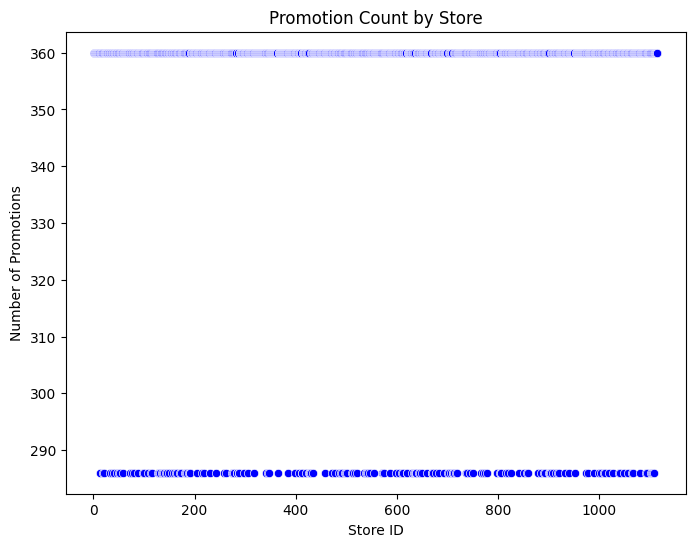

In [47]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='store_id', y='Promotion_Count', data=promo_counts_df, color='blue')
plt.xlabel('Store ID')
plt.ylabel('Number of Promotions')
plt.title('Promotion Count by Store')
plt.show()

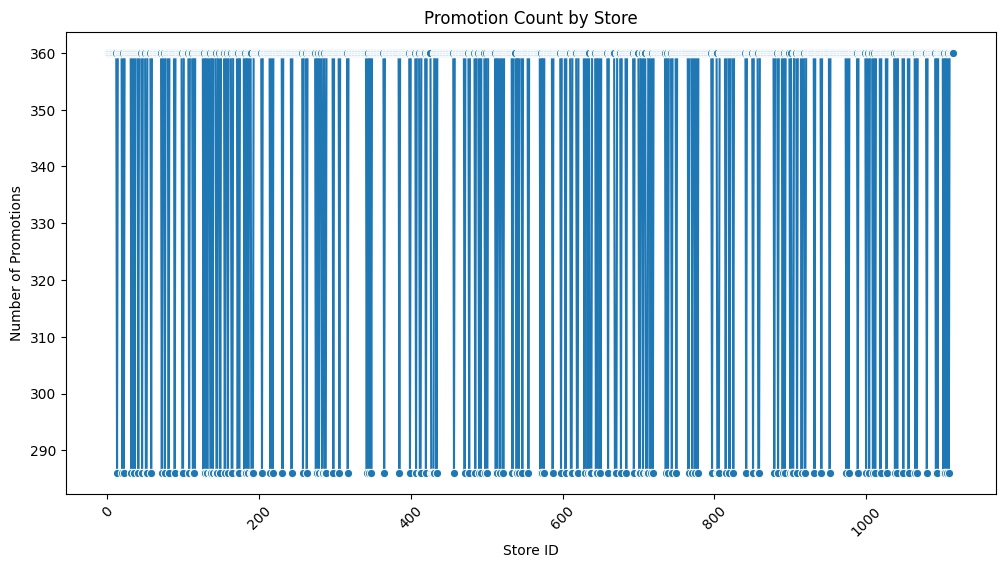

In [49]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='store_id', y='Promotion_Count', data=promo_counts_df, marker='o')
plt.xlabel('Store ID')
plt.ylabel('Number of Promotions')
plt.title('Promotion Count by Store')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

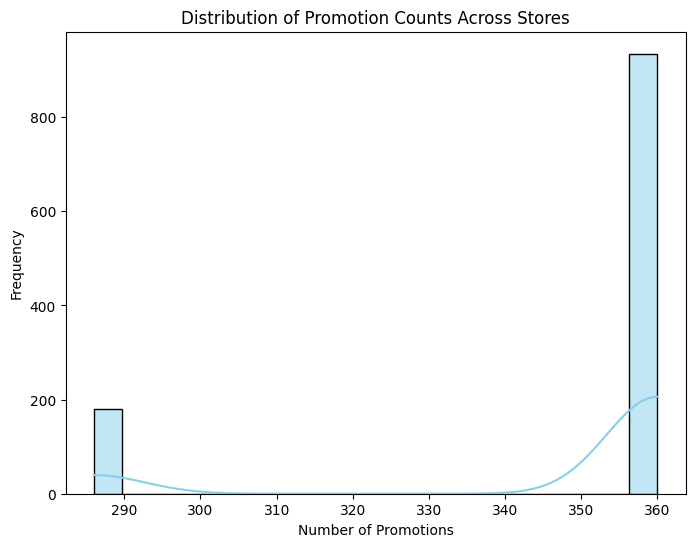

In [48]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(promo_counts_df['Promotion_Count'], bins=20, kde=True, color='skyblue')
plt.xlabel('Number of Promotions')
plt.ylabel('Frequency')
plt.title('Distribution of Promotion Counts Across Stores')
plt.show()

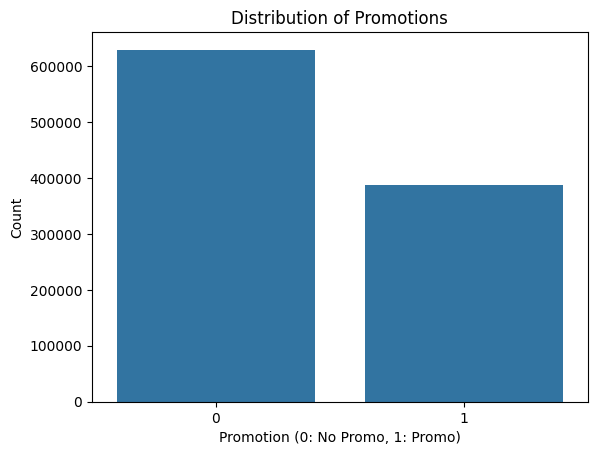

In [9]:
# Create the countplot for 'promotion'
sns.countplot(x='promotion', data=df)

# Customize the plot
plt.title('Distribution of Promotions')
plt.xlabel('Promotion (0: No Promo, 1: Promo)')
plt.ylabel('Count')

# Show the plot
plt.show()

## Weekdays and Weekends

In [56]:
# Create a new column to identify weekdays/weekends
store_train_df['date'] = pd.to_datetime(df['date'])
store_train_df['day_type'] = store_train_df['date'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [58]:
# Calculate average sales for weekdays and weekends
avg_sales_weekday = store_train_df[store_train_df['day_type'] == 'Weekday']['sales'].mean()
avg_sales_weekend = store_train_df[store_train_df['day_type'] == 'Weekend']['sales'].mean()

print(f"Average Sales on Weekdays: {avg_sales_weekday:.2f}")
print(f"Average Sales on Weekends: {avg_sales_weekend:.2f}")


Average Sales on Weekdays: 5737.31
Average Sales on Weekends: 5865.62


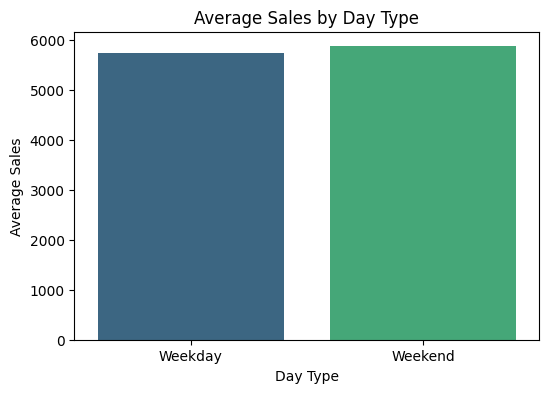

In [59]:
# Create a bar plot to compare average sales
plt.figure(figsize=(6, 4))
sns.barplot(x=['Weekday', 'Weekend'], y=[avg_sales_weekday, avg_sales_weekend], palette='viridis')
plt.title('Average Sales by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average Sales')
plt.show()

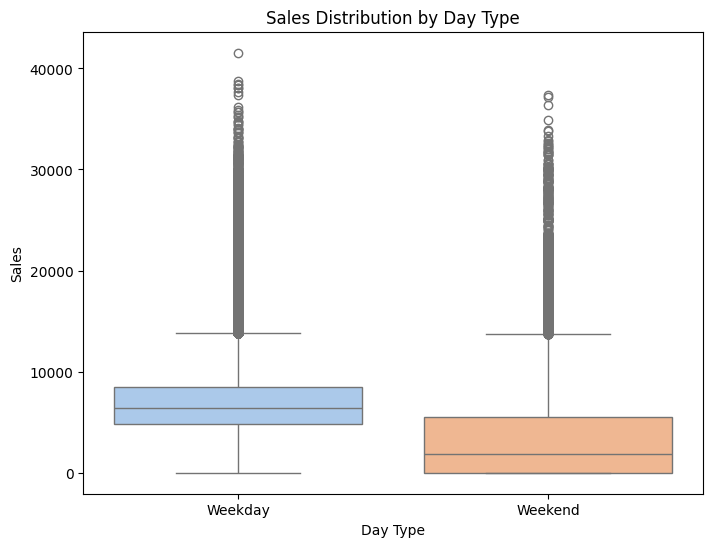

In [61]:
# Create a box plot to visualize sales distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_type', y='sales', data=df, palette='pastel')
plt.title('Sales Distribution by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Sales')
plt.show()

## Assortment type and sales

In [63]:
# Calculate average sales for each assortment level
avg_sales_by_assortment = store_train_df.groupby('assortment_level')['sales'].mean()

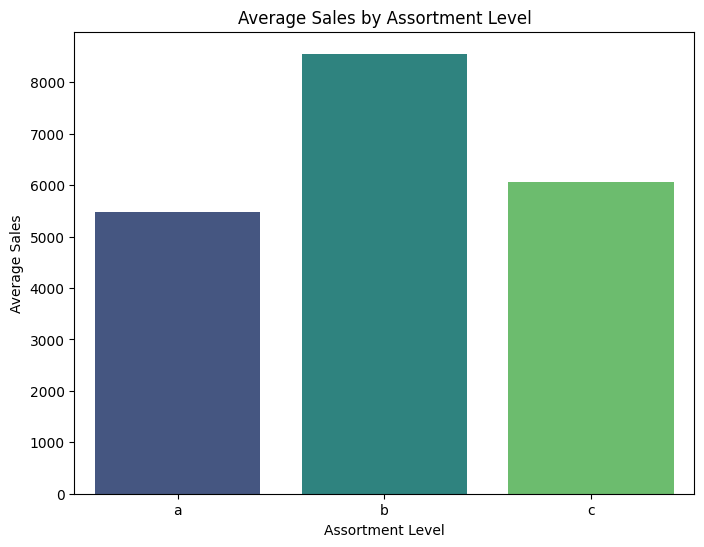

In [64]:
# Create a bar plot to visualize average sales by assortment level
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_assortment.index, y=avg_sales_by_assortment.values, palette='viridis')
plt.xlabel('Assortment Level')
plt.ylabel('Average Sales')
plt.title('Average Sales by Assortment Level')
plt.show()

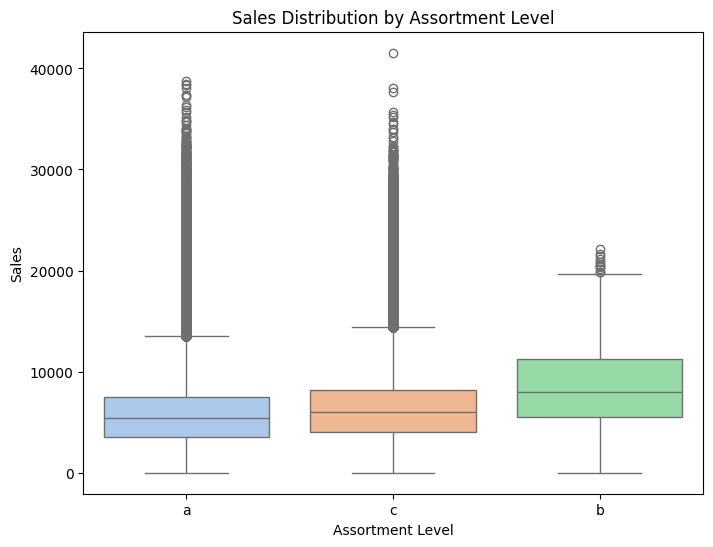

In [66]:
# Create a box plot to visualize sales distribution by assortment level
plt.figure(figsize=(8, 6))
sns.boxplot(x='assortment_level', y='sales', data=store_train_df, palette='pastel')
plt.xlabel('Assortment Level')
plt.ylabel('Sales')
plt.title('Sales Distribution by Assortment Level')
plt.show()

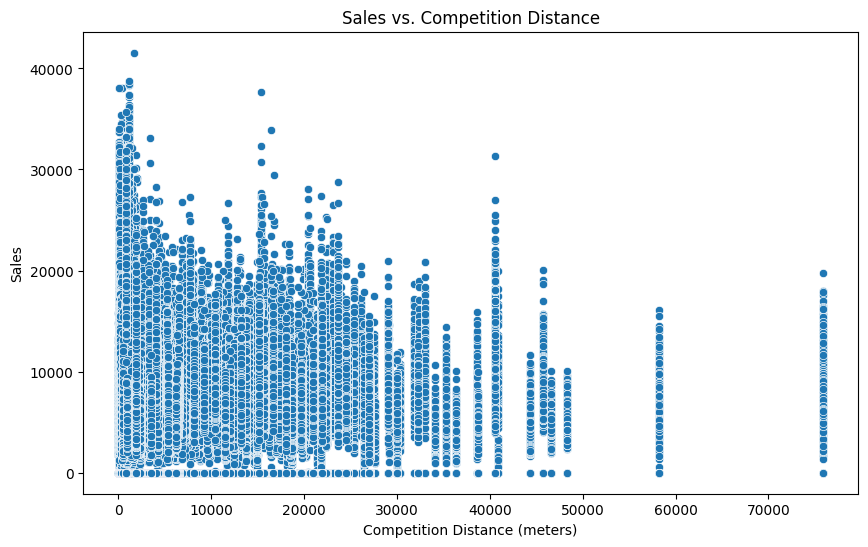

In [69]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='competition_distance_m', y='sales', data=store_train_df)
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.title('Sales vs. Competition Distance')
plt.show()

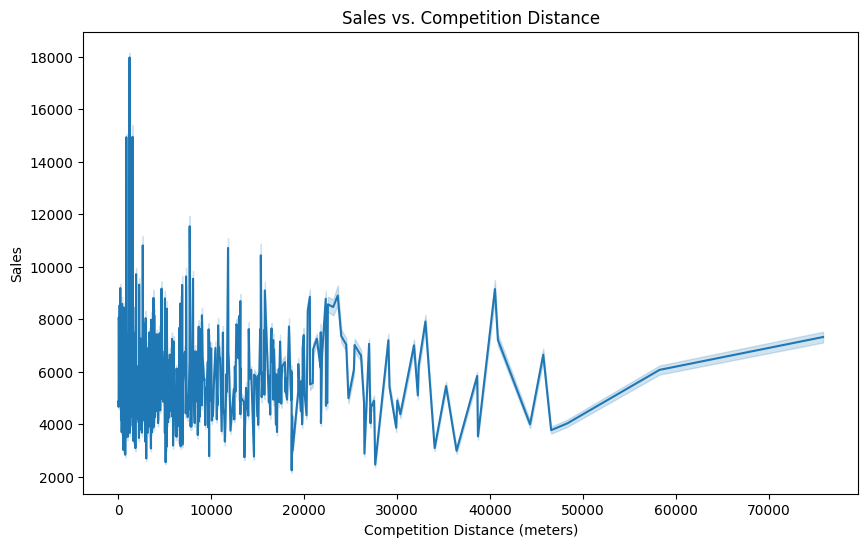

In [71]:
# Sort the DataFrame by competition_distance_m for better visualization
store_train_df_sorted = store_train_df.sort_values(by='competition_distance_m')

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='competition_distance_m', y='sales', data=store_train_df_sorted)
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.title('Sales vs. Competition Distance')
plt.show()

## sales during holiday

In [73]:

# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Print the average sales
print(f"Average Sales during Holidays: {avg_sales_holiday:.2f}")
print(f"Average Sales on Non-Holiday Days: {avg_sales_non_holiday:.2f}")

Average Sales during Holidays: 5992.80
Average Sales on Non-Holiday Days: 5721.14


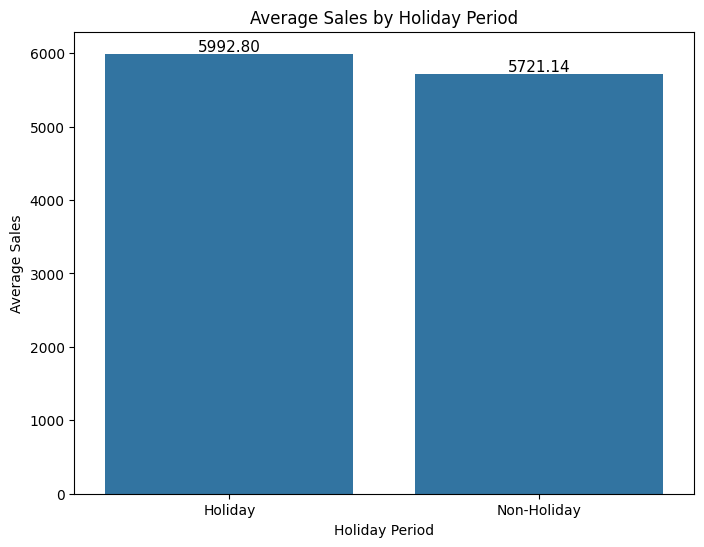

In [74]:
# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Create a DataFrame for plotting
data = {'Holiday Period': ['Holiday', 'Non-Holiday'], 'Average Sales': [avg_sales_holiday, avg_sales_non_holiday]}
plot_df = pd.DataFrame(data)

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Holiday Period', y='Average Sales', data=plot_df)

# Annotate the bars with the average sales values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

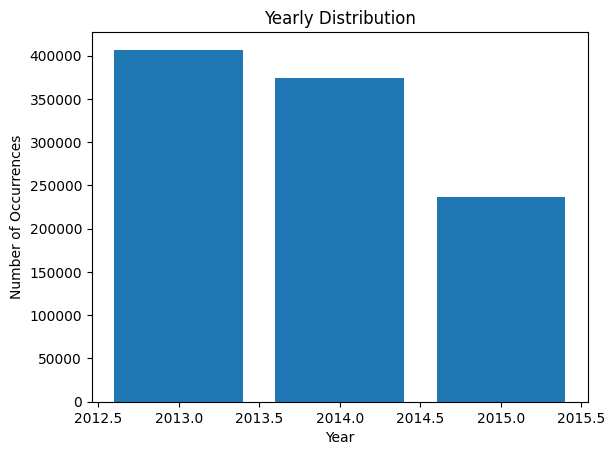

In [75]:
# Extract year
df['Year'] = df['date'].dt.year

# Plot yearly distribution
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Yearly Distribution')
plt.show()